# Завдання 7

## Задано N сфер (відомі координати центра та радіус). Перевірити, чи мають ці сфери спільні точки. Знайти об’єм фігури, що утворилась в результаті їх перетину.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from itertools import combinations

Координати центра та радіуси сфер будемо записувати у файл з назвою 'circles_xyz.txt' та зчитувати з нього дані у двовимірний масив за допомогою функції read_file(filename). На момент виконання вміст цього файлу наступний: 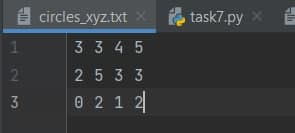

In [2]:
file = 'circles_xyz.txt'

In [3]:
def read_file(filename):
    with open(filename) as f:
        array = []
        for line in f:
            array.append([float(x) for x in line.split()])
    return array

In [4]:
spheres_data = read_file(file)

In [5]:
n = len(spheres_data)
k = 2
comb_list = list(combinations(spheres_data, k))

Визначаємо чи пари сфер зі списку comb_list перетинаються. Для цього знаходимо відстань між центрами цих сфер і якщо ця відстань буде меншою за суму радіусів сфер, тоді вони перетинаються. N сфер не будуть перетинатися, якщо хоча б одна з пар не перетинається

In [6]:
intersect_bool = []
for circles_pair in comb_list:
    x1, y1, z1, r1 = circles_pair[0]
    x2, y2, z2, r2 = circles_pair[1]

    distance = ((x1 - x2) ** 2 + (y1 - y2) ** 2 + (z1 - z2) ** 2) ** 0.5
    if distance <= r1 + r2:
        intersect_bool.append(True)
    else:
        intersect_bool.append(False)

In [7]:
def graph(data, graph_type=None, smallest=None, points=None, inside=None):

    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.set_aspect('auto')

    for sphere in data:
        u = np.linspace(0, 2 * np.pi, 100)
        v = np.linspace(0, np.pi, 100)
        r = sphere[3]
        x = sphere[0] + r * np.outer(np.cos(u), np.sin(v))
        y = sphere[1] + r * np.outer(np.sin(u), np.sin(v))
        z = sphere[2] + r * np.outer(np.ones(np.size(u)), np.cos(v))
        ax.plot_surface(x, y, z,
                        rstride=8, cstride=8, color='r', alpha=.2)


    ax.grid(linewidth=0.2)

    if graph_type == '2':
        x_in, y_in, z_in = list(zip(*inside))
        ax.scatter3D(x_in, y_in, z_in, color='black', s=0.1)

    plt.show()

Усі наступні дії повторюються із завдання 6. Умова для визначення чи належить точка перетину задається наступна: $(x - x_{центр})^2 + (y - y_{центр})^2 + (z - z_{центр})^2 < r^2$, де $x_{центр}, y_{центр}, z_{центр}$ - координати точки центра кола, $x, y, z$ - координати точки, яку перевіряємо на входження, $r$ - радіус кола
   
Обчислюємо довжину списку inside_intersection, що є списком точок, які увійшли в перетин, і отримуємо їх кількість. Знаходимо об'єм куба, що описаний навколо найменшої сфери за формулою: $V = (2r)^3$, де $r$ - радіус найменшої сфери. І, нарешті, обчислюємо об'єм перетину: $V_{перетин} = V \frac{n}{N}$, де $n$ - кількість точок, що увійшли в перетин, $N$ - загальна кількість точок, у даному випадку N = 100 000

In [8]:
def MonteCarlo():
    graph(spheres_data)

    def find_smallest_sphere(data):
        R = []
        for i in range(len(data)):
            R.append(data[i][3])
        min_radius = min(R)

        return data[R.index(min_radius)]

    def generate_points(a, b, c, radius, n):
        xr = np.random.uniform(a - radius, a + radius, n)
        yr = np.random.uniform(b - radius, b + radius, n)
        zr = np.random.uniform(c - radius, c + radius, n)
        return list(zip(xr, yr, zr))

    def points_in_intersection(xyz, data):
        result = []
        x_point, y_point, z_point = list(zip(*xyz))
        center_x, center_y, center_z, radius = list(zip(*data))
        for i in range(len(x_point)):
            result.append([x_point[i], y_point[i], z_point[i]])
            for j in range(len(data)):
                if ((x_point[i] - center_x[j])**2 + (y_point[i] - center_y[j])**2 + (z_point[i] - center_z[j])**2) >= (radius[j] ** 2):
                    result.pop(-1)
                    break
        return result

    smallest_sphere = find_smallest_sphere(spheres_data)
    x, y, z, r = smallest_sphere

    m = 1000000
    xyz_random = generate_points(x, y, z, r, m)

    inside_intersection = points_in_intersection(xyz_random, spheres_data)
    graph(spheres_data, '2', points=xyz_random, inside=inside_intersection)
    points_amount = len(inside_intersection)
    V = (2 * r) ** 3
    v = V * points_amount / m

    print(f'\nThe radius of the smallest sphere is equal to: {r}\n'
          f'The area of the cube is equal to: {V}\n'
          f'Out of {m} points, {points_amount} got inside the intersection of the spheres\n'
          f'The area of the spheres intersection is equal to: {v}')


The spheres intersect


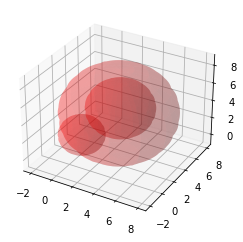

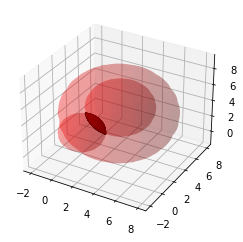


The radius of the smallest sphere is equal to: 2.0
The area of the cube is equal to: 64.0
Out of 1000000 points, 42183 got inside the intersection of the spheres
The area of the spheres intersection is equal to: 2.699712


In [9]:
if __name__ == '__main__':
    if all(intersect_bool):
        print(f'\nThe spheres intersect')
        MonteCarlo()
    else:
        print(f'\nThe spheres NOT intersect')
        exit(1)